In [300]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import math
import random
import datetime
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [301]:
confirmed_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [302]:
confirmed_cases.head()
# confirmed_cases.shape
# confirmed_cases['1/23/20'].sum()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27


In [303]:
deaths_reported = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [304]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,33,36,36,40,42,43,47,50,57,58
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,27,27,27,27,28,28,30
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,375,384,392,402,407,415,419,425,432,437
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,36,37,37,37,37,40,40,40,40,41
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [305]:
recovered_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [306]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,131,135,150,166,179,188,188,207,220,228
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,314,327,345,356,385,394,403,410,422,431
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,235,248,282,309,333,344,344,344,385,398
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [307]:
latest_data = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2020.csv')

In [308]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-29 02:32:29,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-29 02:32:29,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-29 02:32:29,37.767072,-75.632346,223,4,0,219,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-29 02:32:29,43.452658,-116.241552,662,16,0,646,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-29 02:32:29,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [309]:
# Fectching all column names from Confirmed cases dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20',
       '4/25/20', '4/26/20', '4/27/20', '4/28/20'],
      dtype='object', length=102)

In [310]:
# Extracting the date columns
# confirmed = confirmed_cases.iloc[:,4:]
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.iloc[:,4:]
recoveries = recovered_cases.iloc[:,4:]

In [311]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,0,0,0,0,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,0,0,0,0,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
2,0,0,0,0,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,0,0,0,0,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
4,0,0,0,0,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,5,5,6,6,34
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,8


In [312]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [313]:
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []


china_cases = []
italy_cases = []
usa_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
usa_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
usa_recoveries = []
india_recoveries = []

china_recoveries = []
italy_recoveries = []
usa_recoveries = []
india_recoveries = []

In [314]:
for i in dates:
    
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'China'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'China'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'China'][i].sum())

In [315]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400843,
 2471759,
 2548821,
 2624107,
 2707742,
 2811603,
 2897624,
 2972363,
 3041764,
 3116398]

In [316]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3348,
 3460,
 3558,
 3802,
 3988,
 4262,
 4615,
 4721,
 5406,
 5823,
 6450,
 7140,
 7930,
 8779,
 9925,
 11405,
 13108,
 14821,
 16735,
 18928,
 21556,
 24489,
 27886,
 31361,
 34882,
 38804,
 43602,
 48932,
 54991,
 60956,
 67073,
 72145,
 77707,
 85350,
 91946,
 99252,
 106311,
 112422,
 118180,
 123861,
 130490,
 138630,
 145750,
 154521,
 160704,
 165365,
 170578,
 177371,
 183970,
 190628,
 196718,
 202868,
 206568,
 211167,
 217153]

In [317]:
confirmed_sum

3116398

In [318]:
death_sum

217153

In [319]:
recovered_sum

928658

In [320]:
china_cases[-1]

83940

In [321]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    
    return d

In [322]:
world_daily_deaths = daily_increase(total_deaths)
china_daily_deaths = daily_increase(china_deaths)

In [323]:
china_daily_deaths

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [324]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Australia',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea'

In [352]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases=[]
for country in unique_countries:

    cases = latest_data[latest_data['Country_Region'] == country]['Confirmed'].sum()    
    
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(country)

for i in no_cases:
    unique_countries.remove(i)

# Sort countries by number of confirmed cases
unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key= operator.itemgetter(1), reverse=True)]                                    

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region'] == unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Active'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])


Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [326]:
country_df = pd.DataFrame({'Country Name': unique_countries, 
                           'Number of Confirmed Cases':country_confirmed_cases,
                           'Number of Deaths':country_death_cases,
                           'Number of Recoveries':country_recovery_cases,
                           'Number of Active Cases':country_active_cases,
                           'Mortality Rate':country_mortality_rate
                          })

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,1012582,58355,115936,838291,0.0576299
1,Spain,232128,23822,123903,84403,0.102624
2,Italy,201505,27359,68941,105205,0.135773
3,France,169053,23694,47775,97584,0.140157
4,United Kingdom,162350,21745,813,139792,0.133939
5,Germany,159912,6314,117400,36198,0.0394842
6,Turkey,114653,2992,38809,72852,0.0260961
7,Russia,93558,867,8456,84235,0.00926698
8,Iran,92584,5877,72439,14268,0.0634775
9,China,83940,4637,78422,881,0.0552418


In [327]:
sorted(zip(unique_countries, country_confirmed_cases), key= operator.itemgetter(1), reverse=True)

[('US', 1012582),
 ('Spain', 232128),
 ('Italy', 201505),
 ('France', 169053),
 ('United Kingdom', 162350),
 ('Germany', 159912),
 ('Turkey', 114653),
 ('Russia', 93558),
 ('Iran', 92584),
 ('China', 83940),
 ('Brazil', 73235),
 ('Canada', 51150),
 ('Belgium', 47334),
 ('Netherlands', 38612),
 ('India', 31324),
 ('Peru', 31190),
 ('Switzerland', 29264),
 ('Portugal', 24322),
 ('Ecuador', 24258),
 ('Saudi Arabia', 20077),
 ('Ireland', 19877),
 ('Sweden', 19621),
 ('Mexico', 16752),
 ('Israel', 15728),
 ('Austria', 15357),
 ('Singapore', 14951),
 ('Pakistan', 14612),
 ('Chile', 14365),
 ('Japan', 13736),
 ('Poland', 12218),
 ('Belarus', 12208),
 ('Qatar', 11921),
 ('Romania', 11616),
 ('United Arab Emirates', 11380),
 ('Korea, South', 10761),
 ('Indonesia', 9511),
 ('Ukraine', 9410),
 ('Denmark', 9049),
 ('Philippines', 7958),
 ('Norway', 7660),
 ('Czechia', 7504),
 ('Australia', 6744),
 ('Serbia', 6630),
 ('Bangladesh', 6462),
 ('Dominican Republic', 6416),
 ('Panama', 6021),
 ('Colombi

In [328]:
unique_provinces = list(latest_data['Province_State'].unique())
unique_provinces

['South Carolina',
 'Louisiana',
 'Virginia',
 'Idaho',
 'Iowa',
 'Kentucky',
 'Missouri',
 'Oklahoma',
 'Colorado',
 'Illinois',
 'Indiana',
 'Mississippi',
 'Nebraska',
 'Ohio',
 'Pennsylvania',
 'Washington',
 'Wisconsin',
 'Vermont',
 'Minnesota',
 'Florida',
 'North Carolina',
 'California',
 'New York',
 'Wyoming',
 'Michigan',
 'Maryland',
 'Alaska',
 'Kansas',
 'Tennessee',
 'Texas',
 'Maine',
 'Arizona',
 'Georgia',
 'Arkansas',
 'New Jersey',
 'South Dakota',
 'Alabama',
 'West Virginia',
 'North Dakota',
 'Massachusetts',
 'Utah',
 'Montana',
 'New Hampshire',
 'Oregon',
 'New Mexico',
 'Rhode Island',
 'Nevada',
 'District of Columbia',
 'Connecticut',
 'Hawaii',
 'Delaware',
 'Alberta',
 'Anguilla',
 'Anhui',
 'Aruba',
 'Australian Capital Territory',
 'Beijing',
 'Bermuda',
 'Bonaire, Sint Eustatius and Saba',
 'British Columbia',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Chongqing',
 'Curacao',
 'Diamond Princess',
 'Falkland Islands (Malvinas)'

In [339]:
province_confirmed_cases = []
province_death_cases = []
province_active_cases = []
province_recovery_cases = []
province_mortality_rate = []
province_country = []

no_cases=[]
for province in unique_provinces:

    cases = latest_data[latest_data['Province_State'] == province]['Confirmed'].sum()    
    
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(province)

for i in no_cases:
    unique_provinces.remove(i)

# Sort countries by number of confirmed cases
unique_provinces = [k for k,v in sorted(zip(unique_provinces, province_confirmed_cases), key= operator.itemgetter(1), reverse=True)]                                    

for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State'] == unique_provinces[i]]['Confirmed'].sum()
    province_death_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Deaths'].sum())
    province_country.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Country_Region'].unique()[0])
    province_recovery_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Recovered'].sum())
    province_active_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Active'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])


In [340]:
province_df = pd.DataFrame({'Province Name': unique_provinces, 
                            'Province Country':province_country,
                            'Number of Confirmed Cases':province_confirmed_cases,
                            'Number of Deaths':province_death_cases,
                            'Number of Recoveries':province_recovery_cases,
                            'Number of Active Cases':province_active_cases,
                            'Mortality Rate':province_mortality_rate
                          })

province_df.style.background_gradient(cmap='Reds')

,Province Name,Province Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,New York,US,295106,22912,0,272194,0.0776399
1,New Jersey,US,113856,6442,0,107414,0.0565802
2,Hubei,China,68128,4512,63616,0,0.0662283
3,Massachusetts,US,58302,3153,0,55149,0.0540805
4,Illinois,US,48102,2125,0,45977,0.044177
5,California,US,46164,1864,0,44300,0.0403778
6,Pennsylvania,US,45137,2046,0,43091,0.0453287
7,Michigan,US,39262,3568,0,35694,0.0908767
8,Florida,US,32848,1171,0,31677,0.0356491
9,Louisiana,US,27286,1801,0,25485,0.0660045


In [331]:
# Dealing with Missing values

nan_indicies = []

# Handle NAN if there is any

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indicies.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indicies:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


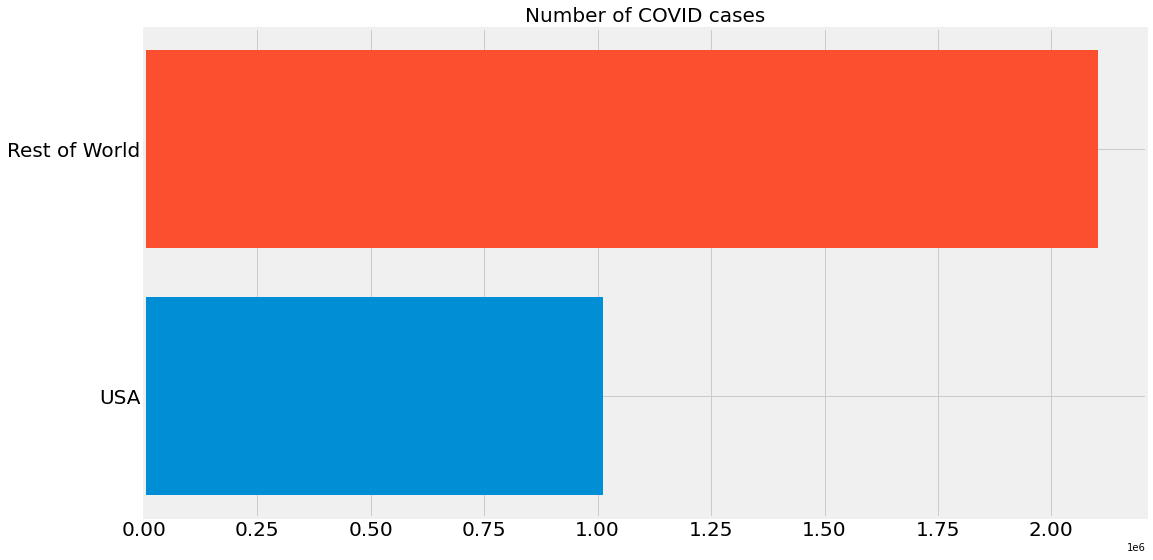

In [345]:
usa_confirmed = latest_data[latest_data['Country_Region'] == 'US']['Confirmed'].sum()
rest_of_world = np.sum(country_confirmed_cases) - usa_confirmed

plt.figure(figsize=(16,9))
plt.barh('USA', usa_confirmed)
plt.barh('Rest of World', rest_of_world)
plt.title('Number of COVID cases',size =20)
plt.xticks(size =20)
plt.yticks(size =20)
plt.show()

In [333]:
print('{} Cases Outside USA'.format(rest_of_world))
print('{} Cases in USA'.format(usa_confirmed))
print('Total Cases in the world are : {}'.format(rest_of_world+usa_confirmed))

2103816 Cases Outside USA
1012582 Cases in USA
Total Cases in the world are : 3116398


In [349]:
# Show 10 countries with most confirmed cases, the rest are grouped into others category
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

# country_confirmed_cases.sort(reverse=True)

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)
unique_countries

['US',
 'Spain',
 'Italy',
 'France',
 'United Kingdom',
 'Germany',
 'Turkey',
 'Russia',
 'Iran',
 'China',
 'Brazil',
 'Canada',
 'Belgium',
 'Netherlands',
 'India',
 'Peru',
 'Switzerland',
 'Portugal',
 'Ecuador',
 'Saudi Arabia',
 'Ireland',
 'Sweden',
 'Mexico',
 'Israel',
 'Austria',
 'Singapore',
 'Pakistan',
 'Chile',
 'Japan',
 'Poland',
 'Belarus',
 'Qatar',
 'Romania',
 'United Arab Emirates',
 'Korea, South',
 'Indonesia',
 'Ukraine',
 'Denmark',
 'Philippines',
 'Norway',
 'Czechia',
 'Australia',
 'Serbia',
 'Bangladesh',
 'Dominican Republic',
 'Panama',
 'Colombia',
 'Malaysia',
 'Egypt',
 'South Africa',
 'Finland',
 'Morocco',
 'Argentina',
 'Luxembourg',
 'Algeria',
 'Moldova',
 'Kuwait',
 'Kazakhstan',
 'Thailand',
 'Bahrain',
 'Hungary',
 'Greece',
 'Oman',
 'Croatia',
 'Uzbekistan',
 'Iraq',
 'Armenia',
 'Afghanistan',
 'Iceland',
 'Azerbaijan',
 'Cameroon',
 'Ghana',
 'Estonia',
 'Bosnia and Herzegovina',
 'Nigeria',
 'New Zealand',
 'Cuba',
 'North Macedonia'

In [337]:
def plot_bar_graph(x,y, title):
    plt.figure(figsize=(16,9))
    plt.barh(x,y)
    plt.title(title)
    # plt.xticks(size =20)
    # plt.yticks(size =20)
    plt.show()

visual_unique_countries
plt.xlim(xmin * scale_factor, xmax * scale_factor)

plt.ylim(ymin * scale_factor, ymax * scale_factor)

['US',
 'Spain',
 'Italy',
 'France',
 'United Kingdom',
 'Germany',
 'Turkey',
 'Russia',
 'Iran',
 'China',
 'Others']

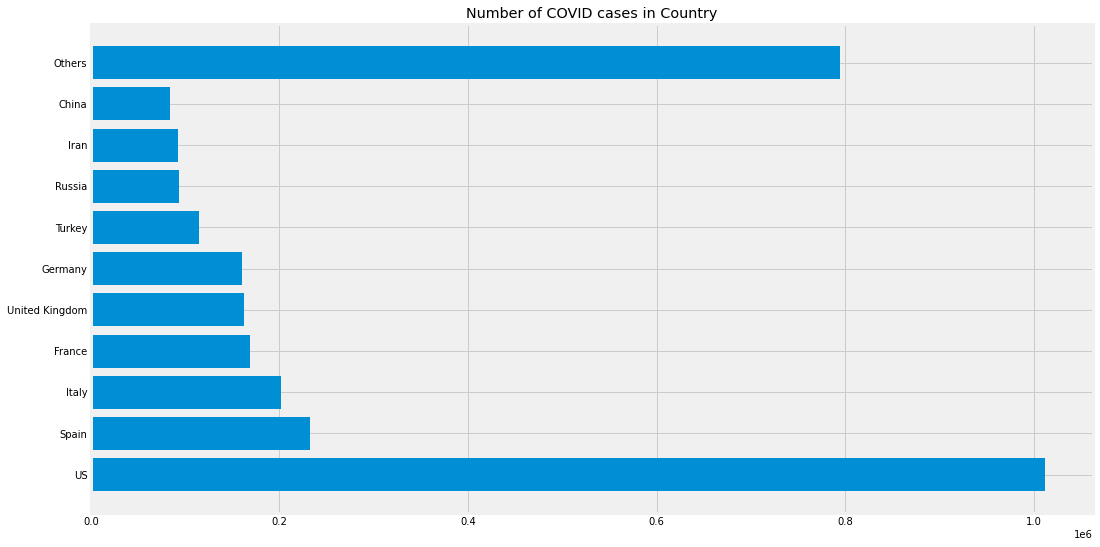

In [338]:
plot_bar_graph(visual_unique_countries, visual_confirmed_cases, 'Number of COVID cases in Country')

In [348]:
# Pie chart